# iAB_RBC_283 Red Blood Cell Attributes

Set the environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
from cobrapy_bigg_client import client
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)

Load the red blood cell model iAB_RBC_283.json

In [2]:
model = client.download_model('iAB_RBC_283', save=False) # Loading the model to the simulation

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


The model summary

In [3]:
model

Name,iAB_RBC_283
Memory address,0x01ada0ee2d30
Number of metabolites,342
Number of reactions,469
Number of groups,0
Objective expression,1.0*NaKt - 1.0*NaKt_reverse_db47e
Compartments,"cytosol, extracellular space"


The summary of the model using default conditions

In [4]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
acnam_e,EX_acnam_e,3.74E-05,0,0.00%
adn_e,EX_adn_e,0.01,10,0.68%
co2_e,EX_co2_e,5.871,1,39.95%
fru_e,EX_fru_e,0.0075,6,0.31%
gal_e,EX_gal_e,0.3169,6,12.94%
gam_e,EX_gam_e,1E-05,6,0.00%
glc__D_e,EX_glc__D_e,1.12,6,45.72%
h2o_e,EX_h2o_e,5.881,0,0.00%
man_e,EX_man_e,0.01,6,0.41%
Metabolite,Reaction,Flux,C-Number,C-Flux


What is the objective function reaction?

In [5]:
model.reactions.NaKt

Reaction identifier,NaKt
Name,Na+/K+ exchanging ATPase
Memory address,0x01ada14d0c40
Stoichiometry,atp_c + h2o_c + 2.0 k_e + 3.0 na1_c --> adp_c + h_c + 2.0 k_c + 3.0 na1_e + pi_c ATP C10H12N5O13P3 + H2O H2O + 2.0 Potassium + 3.0 Sodium --> ADP C10H12N5O10P2 + H+ + 2.0 Potassium + 3.0 Sodium + Phosphate
GPR,Atp1a1b1 or Atp1a1b2 or Atp1a1b3 or Atp1a1b4
Lower bound,0.0
Upper bound,1000.0


Note that the objective function is not the biomass function but an ATPase. This model is optimizing ATP, not biomass!

Looking at the boundary reactions. First, the exchange reactions.

In [6]:
exchange_ids = [r.id for r in model.exchanges]
exchange_names = [r.name for r in model.exchanges]
exchange_formula = [r.reaction for r in model.exchanges]
exchange_lb = [r.lower_bound for r in model.exchanges]
exchange_ub = [r.upper_bound for r in model.exchanges]
exchangeList = {'Reaction ID': exchange_ids,
                'Reaction Name': exchange_names,
                'Reaction Formula': exchange_formula,
                'Reaction Lower Bound': exchange_lb,
                'Reaction Upper Bound': exchange_ub,
               }
exchange_df = pd.DataFrame(exchangeList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                                   'Reaction Lower Bound','Reaction Upper Bound'])
exchange_df

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound
0,EX_ade_e,Adenine exchange,ade_e <=>,-0.014000,0.010000
1,EX_adn_e,Adenosine exchange,adn_e <=>,-0.010000,0.014000
2,EX_35cgmp_e,"3',5'-Cyclic GMP exchange",35cgmp_e -->,0.000000,0.024000
3,EX_adrnl_e,Adrenaline exchange,adrnl_e <--,-0.037800,0.000000
4,EX_ala__L_e,L-Alanine exchange,ala__L_e -->,0.000000,0.080000
5,EX_arg__L_e,L-Arginine exchange,arg__L_e <--,-0.115200,0.000000
6,EX_ascb__L_e,L-Ascorbate exchange,ascb__L_e -->,0.000000,0.111100
7,EX_3moxtyr_e,3-Methoxytyramine exchange,3moxtyr_e -->,0.000000,0.032400
8,EX_4pyrdx_e,4-Pyridoxate exchange,4pyrdx_e -->,0.000000,0.000383
9,EX_bilglcur_e,Bilirubin monoglucuronide exchange,bilglcur_e -->,0.000000,0.002500


In [7]:
exchange_lb = [r.lower_bound for r in model.exchanges]

Second, the demand reactions

In [8]:
demand_ids = [r.id for r in model.demands]
demand_names = [r.name for r in model.demands]
demand_formula = [r.reaction for r in model.demands]
demand_lb = [r.lower_bound for r in model.demands]
demand_ub = [r.upper_bound for r in model.demands]
demandList = {'Reaction ID': demand_ids,
              'Reaction Name': demand_names,
              'Reaction Formula': demand_formula,
              'Reaction Lower Bound': demand_lb,
              'Reaction Upper Bound': demand_ub,
               }
demand_df = pd.DataFrame(demandList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                                   'Reaction Lower Bound','Reaction Upper Bound'])
demand_df

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound
0,DM_nadh,Demand NADH,nadh_c --> h_c + nad_c,0.0,1000.0


Third, the sink reactions.

In [9]:
model.demands

[<Reaction DM_nadh at 0x1ada13e2be0>]

In [10]:
sink_ids = [r.id for r in model.sinks]
sink_names = [r.name for r in model.sinks]
sink_formula = [r.reaction for r in model.sinks]
sink_lb = [r.lower_bound for r in model.sinks]
sink_ub = [r.upper_bound for r in model.sinks]
sinkList = {'Reaction ID': sink_ids,
            'Reaction Name': sink_names,
            'Reaction Formula': sink_formula,
            'Reaction Lower Bound': sink_lb,
            'Reaction Upper Bound': sink_ub,
           }
sink_df = pd.DataFrame(sinkList, columns= ['Reaction ID','Reaction Name','Reaction Formula',
                                             'Reaction Lower Bound','Reaction Upper Bound' ])
sink_df

,Reaction ID,Reaction Name,Reaction Formula,Reaction Lower Bound,Reaction Upper Bound
0,SK_pchol_hs_18_1_18_1_c,Sink pchol hs 18 1 18 1(c),pchol_hs_18_1_18_1_c <=>,-10.0,10.0
1,SK_pchol_hs_18_1_18_2_c,Sink pchol hs 18 1 18 2(c),pchol_hs_18_1_18_2_c <=>,-10.0,10.0
2,SK_pchol_hs_18_2_16_0_c,Sink pchol hs 18 2 16 0(c),pchol_hs_18_2_16_0_c <=>,-10.0,10.0
3,SK_pchol_hs_18_2_18_1_c,Sink pchol hs 18 2 18 1(c),pchol_hs_18_2_18_1_c <=>,-10.0,10.0
4,SK_pe_hs_16_0_16_0_c,Sink pe hs 16 0 16 0(c),pe_hs_16_0_16_0_c <=>,-10.0,10.0
5,SK_pe_hs_16_0_18_1_c,Sink pe hs 16 0 18 1(c),pe_hs_16_0_18_1_c <=>,-10.0,10.0
6,SK_pe_hs_16_0_18_2_c,Sink pe hs 16 0 18 2(c),pe_hs_16_0_18_2_c <=>,-10.0,10.0
7,SK_pe_hs_18_1_18_1_c,Sink pe hs 18 1 18 1(c),pe_hs_18_1_18_1_c <=>,-10.0,10.0
8,SK_pe_hs_18_1_18_2_c,Sink pe hs 18 1 18 2(c),pe_hs_18_1_18_2_c -->,0.0,1000.0
9,SK_pe_hs_18_2_16_0_c,Sink pe hs 18 2 16 0(c),pe_hs_18_2_16_0_c -->,0.0,1000.0


All these sink reaction imply that this is not a well developed model

Now let's look at the Escher model of the red blod cell

In [11]:
builder = Builder(
    model_json='iAB_RBC_283.json' 
)
# For windows machines
builder.map_json = '.\iAB_RBC_283.metabolism.json' # File needs to be in the current directory

# For Mac machines
#builder.map_json = './iAB_RBC_283.metabolism.json' # File needs to be in the current directory
builder

Builder()

Plot the fluxes for the default model settings

In [12]:
solution = model.optimize()
builder.reaction_data = solution.fluxes

Now let's sample the model

In [13]:
%%time
RBC_samples = sample(model, 2000, processes=8) #Set this to 1000 for faster, less accurate performance
RBC_samples.head(10) # Do not list all the samples, it could overload the browser memory

Read LP format model from file C:\Users\hinton\AppData\Local\Temp\tmpaj30k09_.lp
Reading time = 0.01 seconds
: 342 rows, 938 columns, 3344 nonzeros
Wall time: 18 s


,SK_pchol_hs_18_1_18_1_c,SK_pchol_hs_18_1_18_2_c,SK_pchol_hs_18_2_16_0_c,SK_pchol_hs_18_2_18_1_c,SK_pe_hs_16_0_16_0_c,SK_pe_hs_16_0_18_1_c,SK_pe_hs_16_0_18_2_c,SK_pe_hs_18_1_18_1_c,SK_pe_hs_18_1_18_2_c,SK_pe_hs_18_2_16_0_c,...,XYLK,XYLTD_D,XYLUR,ARD,CEPTC_18_1_18_2,CEPTC_18_2_16_0,CEPTC_18_2_18_1,CEPTE_16_0_18_1,CEPTE_16_0_18_2,CEPTE_18_1_18_1
0,-0.001483,0.081477,-0.000801,-0.081088,0.000144,0.0,0.0,0.000002,0.000398,0.0,...,0.023283,0.023283,0.023283,0.001676,0.084591,0.003896,0.005737,0.0,0.0,0.000002
1,-0.001402,0.037145,0.002621,-0.036800,0.000343,0.0,0.0,0.000017,0.000335,0.0,...,0.060803,0.060803,0.060803,0.003365,0.044868,0.006943,0.012985,0.0,0.0,0.000017
2,0.001437,0.006707,0.038438,-0.010472,0.000371,0.0,0.0,0.000017,0.000345,0.0,...,0.030162,0.030162,0.030162,0.006802,0.019862,0.042879,0.002194,0.0,0.0,0.000017
3,0.001387,-0.001657,0.012887,-0.002114,0.000542,0.0,0.0,0.000009,0.000327,0.0,...,0.031339,0.031339,0.031339,0.008436,0.001657,0.017232,0.003386,0.0,0.0,0.000009
4,0.002896,-0.007254,0.003606,0.003572,0.000586,0.0,0.0,0.000009,0.000327,0.0,...,0.042146,0.042146,0.042146,0.006790,0.001798,0.015317,0.007943,0.0,0.0,0.000009
5,0.002231,0.010719,0.011394,-0.014090,0.000533,0.0,0.0,0.000009,0.000330,0.0,...,0.032901,0.032901,0.032901,0.006076,0.011153,0.013493,0.011338,0.0,0.0,0.000009
6,0.029349,-0.006175,0.006101,0.002731,0.000636,0.0,0.0,0.000008,0.000342,0.0,...,0.064996,0.064996,0.064996,0.004329,0.013396,0.007805,0.013963,0.0,0.0,0.000008
7,0.000026,0.015466,-0.041756,-0.015111,0.000711,0.0,0.0,0.000008,0.000386,0.0,...,0.018084,0.018084,0.018084,0.005618,0.017063,0.021004,0.006589,0.0,0.0,0.000008
8,0.006407,0.000555,0.015404,-0.006564,0.000673,0.0,0.0,0.000001,0.000363,0.0,...,0.020066,0.020066,0.020066,0.004854,0.004492,0.023827,0.000086,0.0,0.0,0.000001
9,0.006258,0.005045,0.002629,-0.010891,0.000696,0.0,0.0,0.000001,0.000472,0.0,...,0.032575,0.032575,0.032575,0.003170,0.007444,0.011981,0.000578,0.0,0.0,0.000001


Let's plot some of the reactions samples

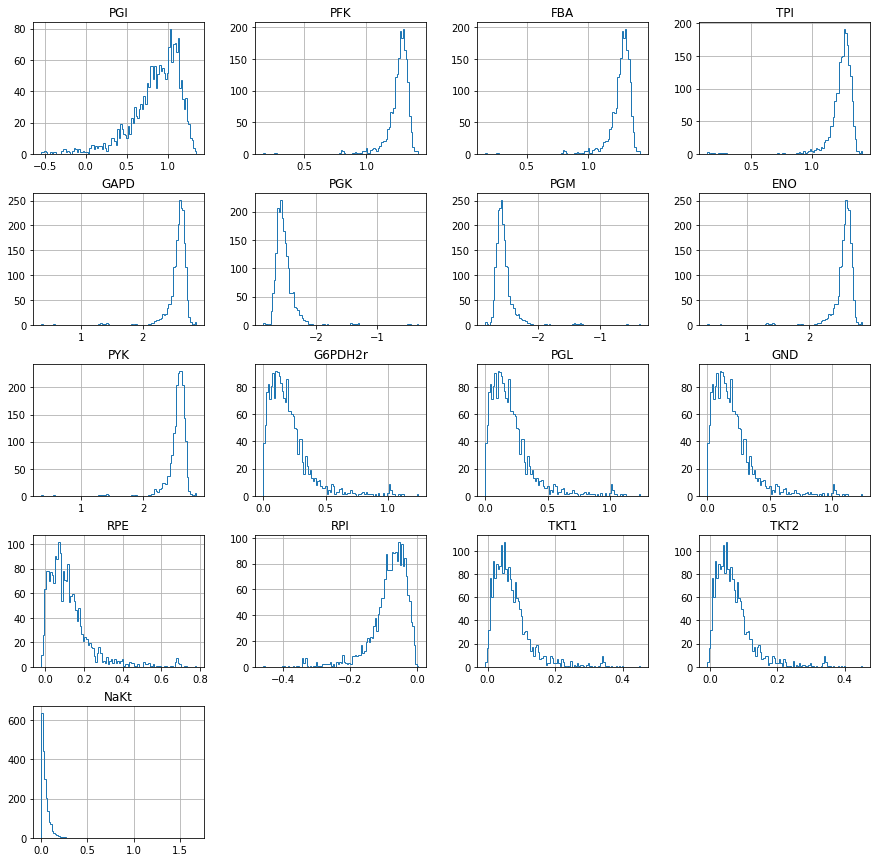

In [14]:
RBC_samples.hist(column = ['PGI','PFK','FBA','TPI','GAPD','PGK','PGM','ENO','PYK','G6PDH2r','PGL',
                           'GND','RPE','RPI','TKT1','TKT2','NaKt'], 
       bins=100,figsize=(15,15),histtype = 'step');